In [51]:
import dicom
import pydicom
import os
import numpy
import pandas as pd
import seaborn
from matplotlib import pyplot, cm
from natsort import natsorted
import datetime
from scipy import stats

Se crea una lista con los nombres de los archivos DICOM que estan en el directorio. Se hace esto porque en ocasiones, dentro de diferentes directorios hay archivos dcm del mismo estudio.

In [3]:
PathDicom = "./decompressed/"
lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesDCM.append(os.path.join(dirName,filename))

En ocasiones, los archivos tienen nombres como im1, im2 .. , im10, im11, im12 ... im20, im21, im22 ..
Para que queden bien ordenadas, se utiliza natsorted sobre la lista (sino quedarian im1, im10, im12, im13 ... im2, im21, im22, ...

Con natsorted quedan ordenadas im1, im2, im3 ..., im10, im11, im12...

In [4]:
lstFilesDCM = natsorted(lstFilesDCM)

Se toma como referencia un archivo de los dicom para obtener la cantidad de pixels (volumetrica) (x * y * numero de slices) y calculamos el volumen con el espaciado entre pixels y espesor de slice (distancia_pixels_enx * distancia_pixels_eny * espesor_slice).

In [5]:
dicomReferencia = dicom.read_file(lstFilesDCM[0])

dimensionVolumenDCM = (int(dicomReferencia.Rows), int(dicomReferencia.Columns), len(lstFilesDCM))

espaciadoEntrePixels = (float(dicomReferencia.PixelSpacing[0]), float(dicomReferencia.PixelSpacing[1]), float(dicomReferencia.SliceThickness)) 

tomamos las dimensiones en mm de acuerdo al numero de pixels presentes en cada eje y la distancia entre pixels. en el caso de z lo hacemos con el espesor entre slice y numero de slices.

In [6]:
x = numpy.arange(0.0, (dimensionVolumenDCM[0]+1)*espaciadoEntrePixels[0], espaciadoEntrePixels[0])
y = numpy.arange(0.0, (dimensionVolumenDCM[1]+1)*espaciadoEntrePixels[1], espaciadoEntrePixels[1])
z = numpy.arange(0.0, (dimensionVolumenDCM[2]+1)*espaciadoEntrePixels[2], espaciadoEntrePixels[2])

Por ultimo, armamos un array con todos los slices de la imagen. Es un array de matrices.

In [7]:
arrayDicom = numpy.zeros(dimensionVolumenDCM, dtype=dicomReferencia.pixel_array.dtype)

for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    arrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

In [8]:
arrayDicoms = []

for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    arrayDicoms.append(ds)

In [9]:
for dicom in arrayDicoms:
    print(dicom.ContentTime, dicom.AcquisitionTime, dicom.ContentDate, dicom.AcquisitionDate)

142112.120009 142112.120009 20060919 20060919
142112.120009 142112.120009 20060919 20060919
142112.135539 142112.135539 20060919 20060919
142112.157909 142112.157909 20060919 20060919
142112.241433 142112.241433 20060919 20060919
142112.260705 142112.260705 20060919 20060919
142112.283114 142112.283114 20060919 20060919
142112.366638 142112.366638 20060919 20060919
142112.385910 142112.385910 20060919 20060919
142112.408320 142112.408320 20060919 20060919
142112.491321 142112.491321 20060919 20060919
142112.511116 142112.511116 20060919 20060919
142112.533002 142112.533002 20060919 20060919
142112.616406 142112.616406 20060919 20060919
142112.635838 142112.635838 20060919 20060919
142112.657725 142112.657725 20060919 20060919
142112.741209 142112.741209 20060919 20060919
142112.761004 142112.761004 20060919 20060919
142112.782931 142112.782931 20060919 20060919
142112.866012 142112.866012 20060919 20060919
142112.885324 142112.885324 20060919 20060919
142112.907734 142112.907734 200609

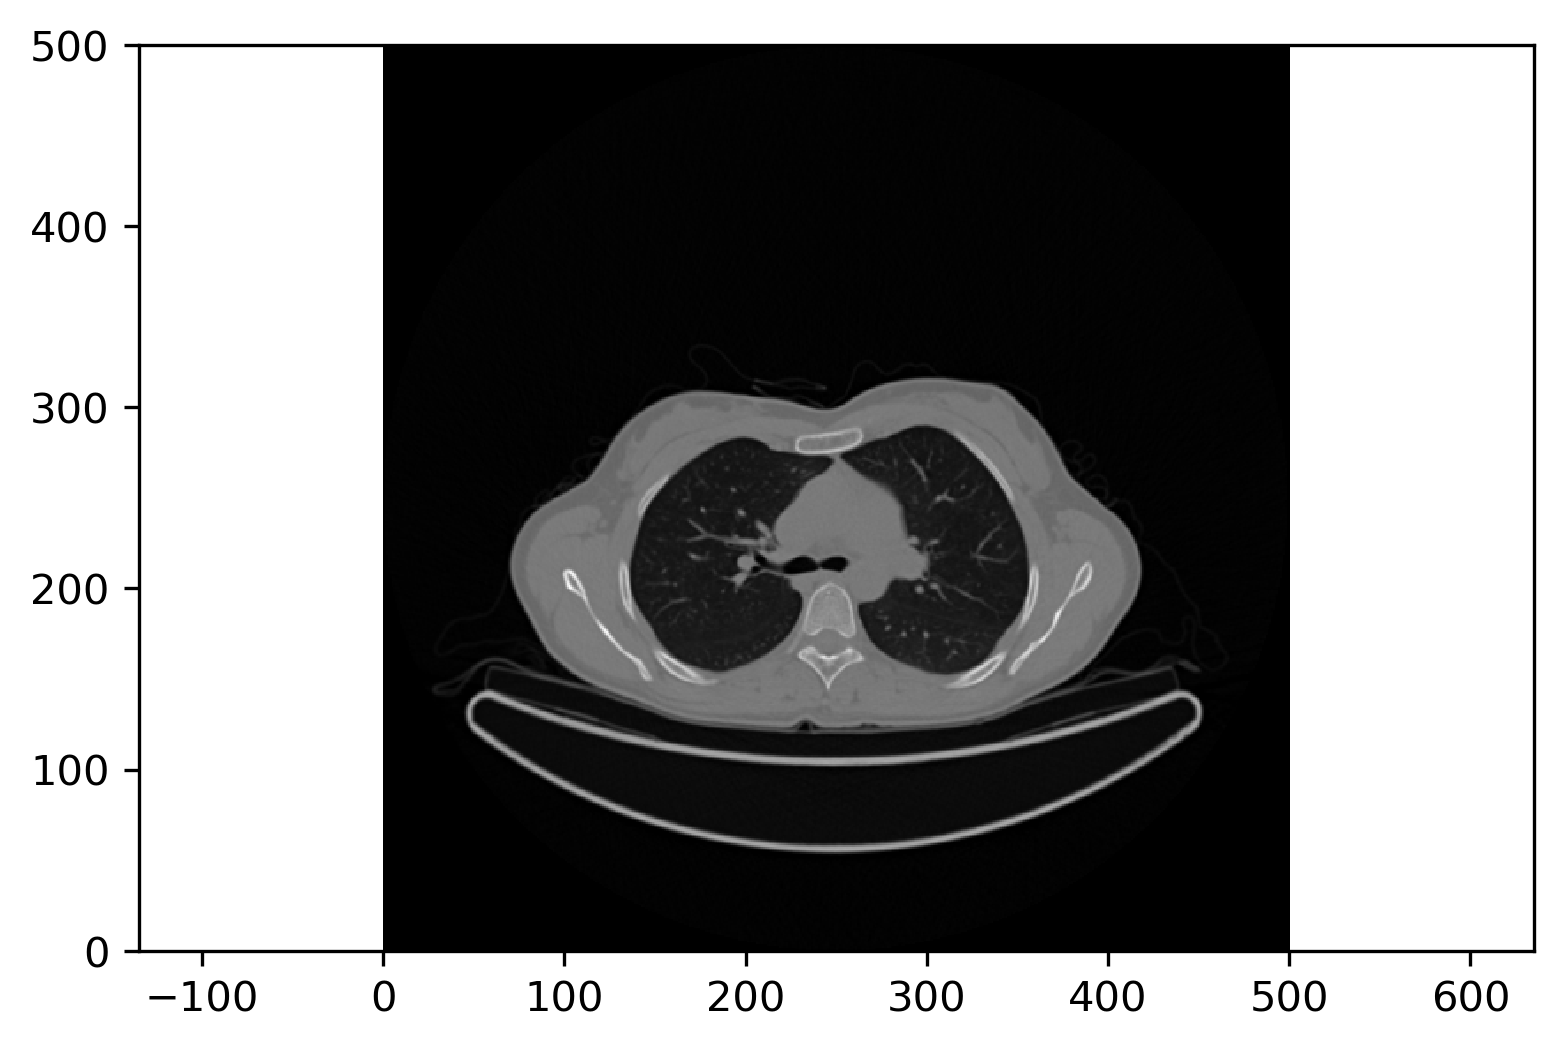

In [10]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(arrayDicom[:, :, 500]))

A continuacion, para realizar una segmentacion "visual", podemos ver los valores acumulados vertical y horizontalmente.

In [61]:
#imagen = numpy.array(arrayDicom[:,:,20]) / numpy.max(arrayDicom[:,:,20])
imagen = numpy.array(arrayDicom[:,:,500])

In [12]:
sumaX = numpy.sum(imagen, axis=0)
sumaY = numpy.sum(imagen, axis=1)

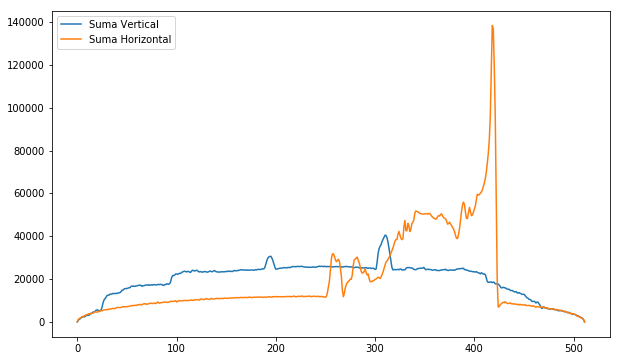

In [13]:
pyplot.figure(figsize=(10,6))
pyplot.plot(numpy.arange(len(sumaX)), sumaX, label='Suma Vertical')
pyplot.plot(numpy.arange(len(sumaY)), sumaY, label='Suma Horizontal')
pyplot.legend()
pyplot.show()

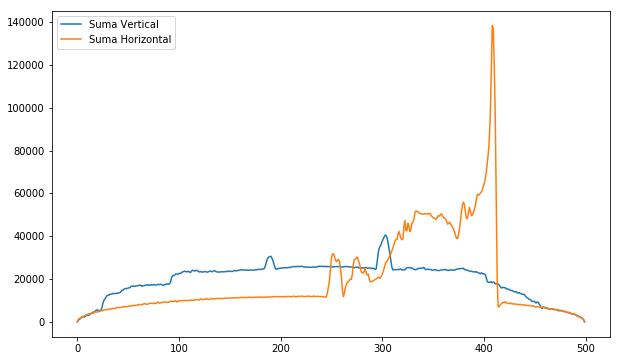

In [14]:
pyplot.figure(figsize=(10,6))
pyplot.plot(numpy.arange(len(sumaX))*espaciadoEntrePixels[0], sumaX, label='Suma Vertical')
pyplot.plot(numpy.arange(len(sumaY))*espaciadoEntrePixels[1], sumaY, label='Suma Horizontal')
pyplot.legend()
pyplot.show()

/home/adelarja/anaconda3/envs/diplodatos/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


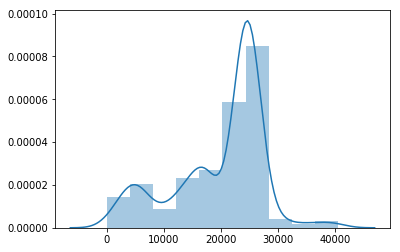

In [15]:
seaborn.distplot(sumaX, bins=10)

In [16]:
imagen*(imagen > 20000)*1.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Una posible forma de segmentar, es aprovechando las cualidades de multiplicacion punto a punto de numpy. Tomando valores > 10000 se obtiene lo siguiente.

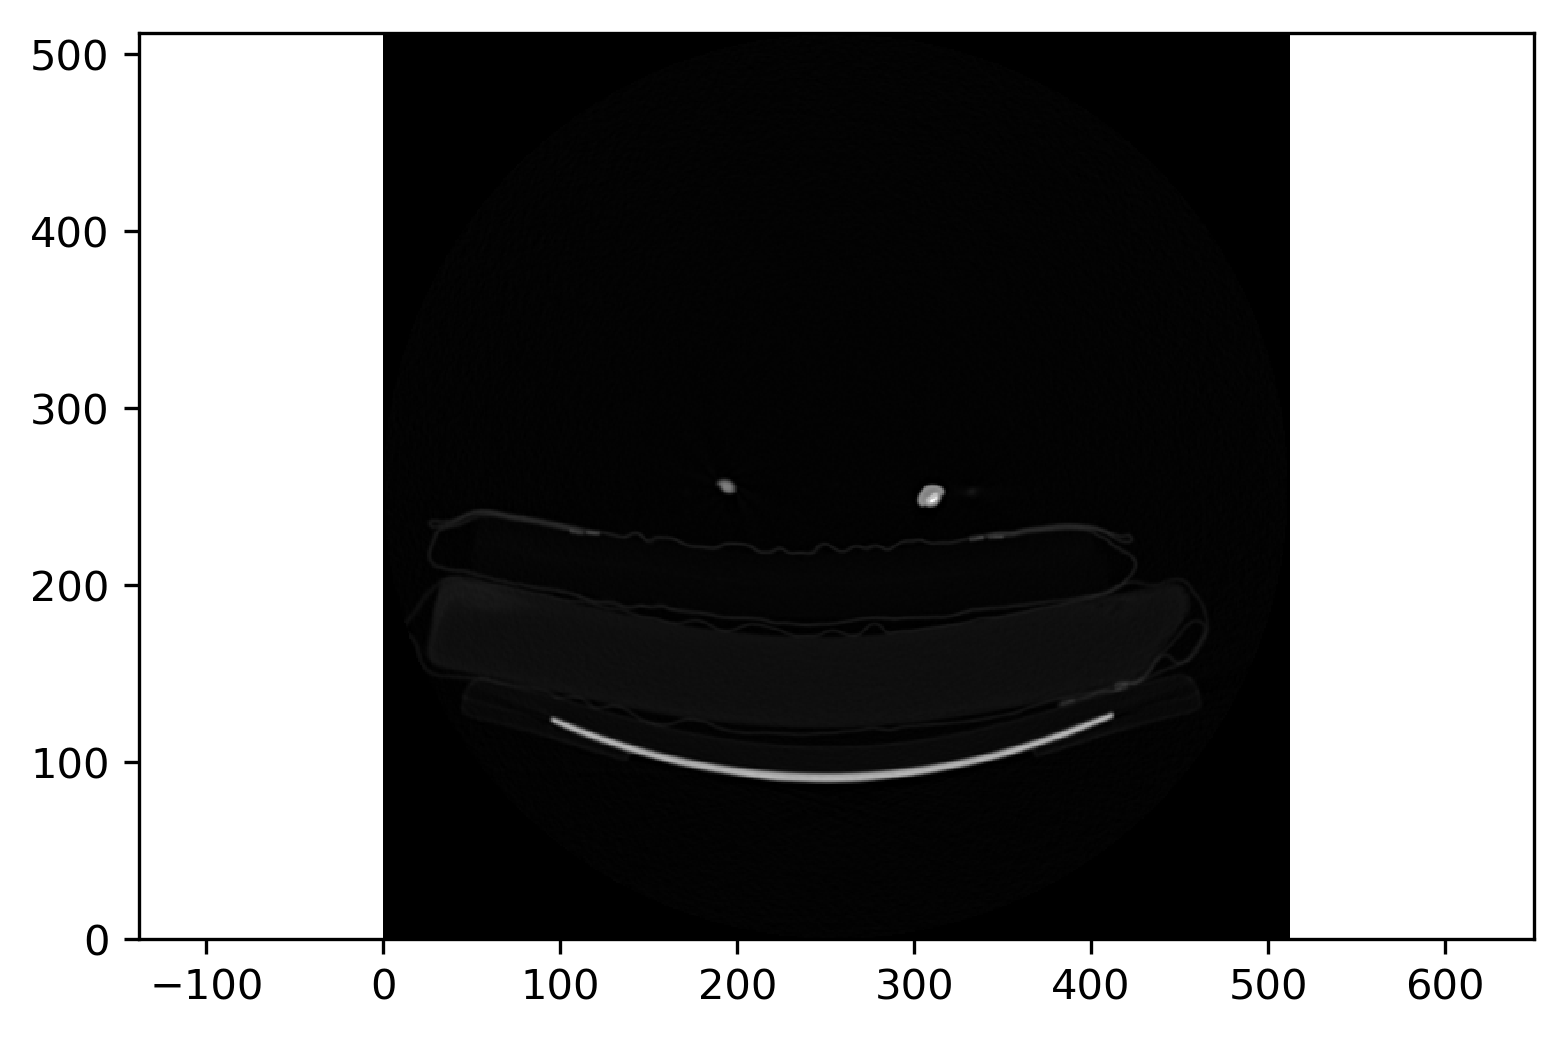

In [31]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(numpy.flipud(imagen*(imagen > -2000)*1.))

# PUNTOS DEL PRÁCTICO

### 1) Distribución de valores de pixels (no tenemos imágenes aún)

Se podría hacer un ravel de los vectores de las imágenes. y comparar iterando sobre las listas.

In [53]:
imagenT1 = numpy.array([1, 2, 3])
imagenT2 = numpy.array([4, 5, 6])
array = numpy.stack((imagenT1, imagenT2), axis=0)

ds = pd.DataFrame(array, columns=['Pixel'+str(i) for i in range(len(imagenT1))])

stats.describe(ds['Pixel0'])

DescribeResult(nobs=2, minmax=(1, 4), mean=2.5, variance=4.5, skewness=0.0, kurtosis=-2.0)

### 2) Valores estadísticos en imágenes

In [60]:
stats.describe(numpy.ravel(arrayDicom[:,:,500]))

DescribeResult(nobs=262144, minmax=(0, 2260), mean=206.31629180908203, variance=143684.25323194187, skewness=1.9018732895370318, kurtosis=2.124607112112952)

Con estos resultados, vemos que hay valores entre 0 y 2660. Vamos a tratar de segmentar en regiones.

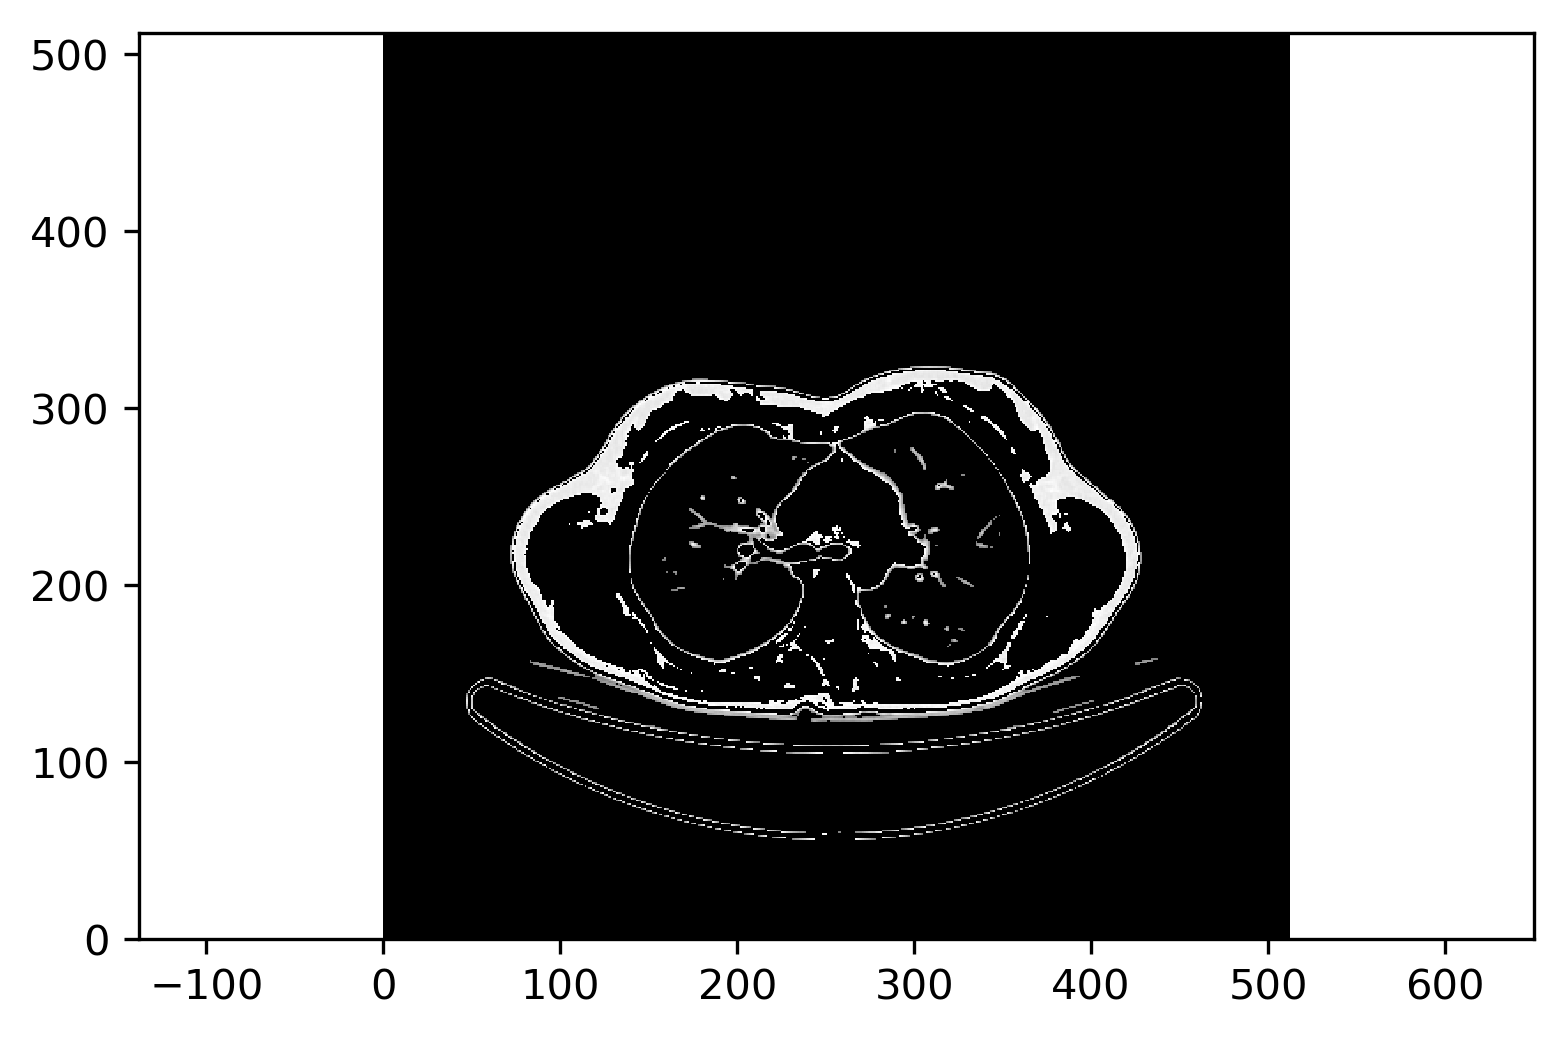

In [78]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
#pyplot.pcolormesh(numpy.flipud(imagen*(imagen > 700)*(imagen < 1000)*1.))
pyplot.pcolormesh(numpy.flipud(imagen*(imagen < 1000)*(imagen > 500)*1.))

In [115]:
valoresDeInteres = imagen*(imagen < 1000)*(imagen > 500)*1.
nonZero = numpy.array([valor for valor in numpy.ravel(valoresDeInteres) if valor != 0])
stats.describe(nonZero)

DescribeResult(nobs=12102, minmax=(501.0, 999.0), mean=856.4972731779872, variance=20393.094571524245, skewness=-1.1141707713522957, kurtosis=-0.14701764040811316)

In [123]:
q1 = numpy.quantile(nonZero, 0.25)
q3 = numpy.quantile(nonZero, 0.75)
iqr = q3-q1
outliers = [a for a in nonZero if ((a >= (q3 + 1.5 * iqr) ) |( a <= (q1 - 1.5 * iqr)))]
outliers

[]

In [127]:
imagenRavel = numpy.ravel(imagen)
q1 = numpy.quantile(imagenRavel, 0.25)
q3 = numpy.quantile(imagenRavel, 0.75)
iqr = q3-q1
outliers = [a for a in imagenRavel if ((a >= (q3 + 1.5 * iqr) ) |( a <= (q1 - 1.5 * iqr)))]
q1, q3, len(imagenRavel), len(outliers)

(14.0, 114.0, 262144, 48781)